<a href="https://colab.research.google.com/github/slowdh/deep-learning-notebooks/blob/main/svhn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [2]:
test_file_path = '/content/drive/MyDrive/Programming/deep_learning/datasets/svhn_test_32x32'
train_file_path = '/content/drive/MyDrive/Programming/deep_learning/datasets/svhn_train_32x32'

In [3]:
# load dataset
train = loadmat(train_file_path)
test = loadmat(test_file_path)
x_train, y_train = train['X'], train['y']
x_test, y_test = test['X'], test['y']

# preprocess data
# x: change shape of input images. and divide by 255.
# y: change label '10' -> '0' for convineance.
x_train = np.moveaxis(x_train, -1, 0) / 255.
x_test = np.moveaxis(x_test, -1, 0) / 255.
y_train[y_train == 10] -= 10
y_test[y_test == 10] -= 10

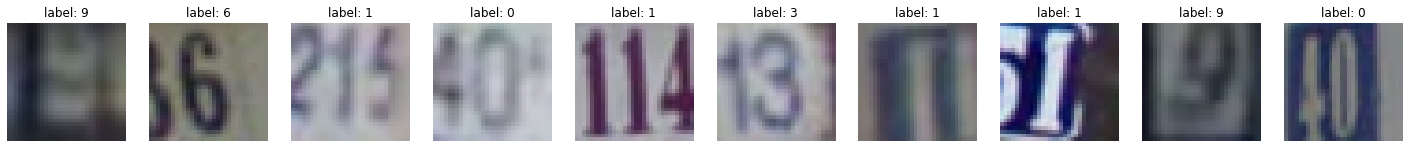

In [31]:
# visualize data
# get random 10 images
choices = np.random.choice(25000, 10)
fig, ax = plt.subplots(1, 10, figsize=(25, 25))
for fig_idx, img_idx in enumerate(choices):
    ax[fig_idx].imshow(x_train[img_idx])
    ax[fig_idx].set_title("label: " + str(y_train[img_idx].squeeze()))
    ax[fig_idx].set_axis_off()

In [14]:
# build model
def get_model(dropout_rate):
    x = x_input = Input(shape=(32, 32, 3))
    x = Conv2D(16, 3, padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    x = MaxPooling2D(2)(x)
    x = Conv2D(32, 3, padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)
    x = MaxPooling2D(2)(x)
    x = Conv2D(64, 3, padding='same')(x)
    x = BatchNormalization(axis=3)(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(2)(x)
    x = Flatten()(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(10, activation='softmax')(x)

    model = Model(x_input, x)
    return model

In [15]:
# get model
model = get_model(0.2)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640

In [16]:
# model check point for saving best weights
save_file_path = '/content/drive/MyDrive/Programming/deep_learning/datasets/svhn-weight.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path, save_best_only=True, save_weights_only=True)

In [17]:
# compile and fit model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0075), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=256, validation_split=0.2, epochs=25, verbose=1, callbacks=[checkpoint])

Epoch 1/25
229/229 [==============================] - 4s 14ms/step - loss: 2.7596 - accuracy: 0.1925 - val_loss: 1.7351 - val_accuracy: 0.4693
Epoch 2/25
229/229 [==============================] - 3s 12ms/step - loss: 0.7849 - accuracy: 0.7552 - val_loss: 0.6562 - val_accuracy: 0.8191
Epoch 3/25
229/229 [==============================] - 3s 12ms/step - loss: 0.5261 - accuracy: 0.8417 - val_loss: 0.5057 - val_accuracy: 0.8492
Epoch 4/25
229/229 [==============================] - 3s 12ms/step - loss: 0.4424 - accuracy: 0.8651 - val_loss: 0.4522 - val_accuracy: 0.8828
Epoch 5/25
229/229 [==============================] - 3s 12ms/step - loss: 0.4051 - accuracy: 0.8794 - val_loss: 0.4048 - val_accuracy: 0.8911
Epoch 6/25
229/229 [==============================] - 3s 12ms/step - loss: 0.3821 - accuracy: 0.8859 - val_loss: 0.3885 - val_accuracy: 0.8933
Epoch 7/25
229/229 [==============================] - 3s 12ms/step - loss: 0.3642 - accuracy: 0.8899 - val_loss: 0.4895 - val_accuracy: 0.8660

In [18]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.089116,0.316236,1.735114,0.469287
1,0.688654,0.788277,0.656155,0.819069
2,0.505058,0.847931,0.505681,0.849236
3,0.444921,0.866718,0.452247,0.882815
4,0.402194,0.879618,0.404800,0.891141


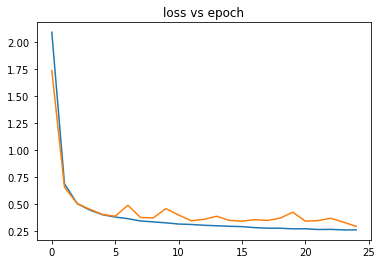

In [19]:
# loss vs epoch plot
plt.plot(df['loss'])
plt.plot(df['val_loss'])
plt.title('loss vs epoch')
plt.show()

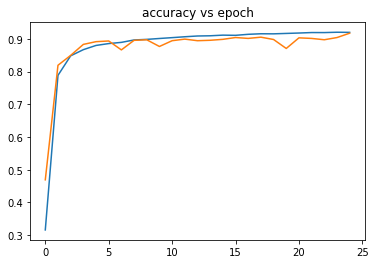

In [21]:
# acc vs epoch plot
plt.plot(df['accuracy'])
plt.plot(df['val_accuracy'])
plt.title('accuracy vs epoch')
plt.show()

In [22]:
# evaluate on test set
test_loss, test_acc = model.evaluate(x=x_test, y=y_test, batch_size=256)

102/102 [==============================] - 1s 5ms/step - loss: 0.3117 - accuracy: 0.9148


In [34]:
# predict with model
prediction = np.argmax(model.predict(x_test), axis=1)

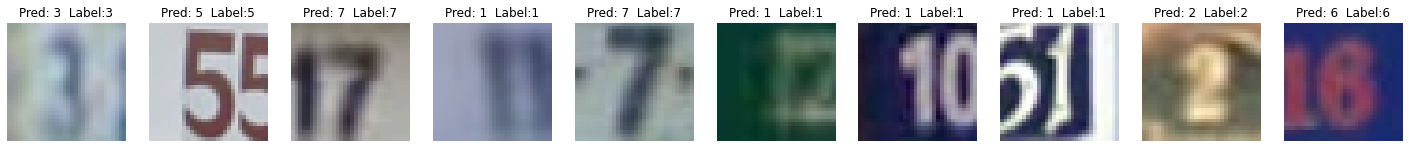

In [39]:
# want to see prediction results?
choices = np.random.choice(x_test.shape[0], 10)
fig, ax = plt.subplots(1, 10, figsize=(25, 25))
for fig_idx, img_idx in enumerate(choices):
    ax[fig_idx].imshow(x_test[img_idx])
    ax[fig_idx].set_title('Pred: ' + str(prediction[img_idx]) + '  Label:' + str(y_test[img_idx].squeeze()))
    ax[fig_idx].set_axis_off()

In [59]:
# or maybe only wrong predictions?
prediction = prediction.reshape((-1, 1))
wrong_idices = np.where(prediction != y_test)[0]

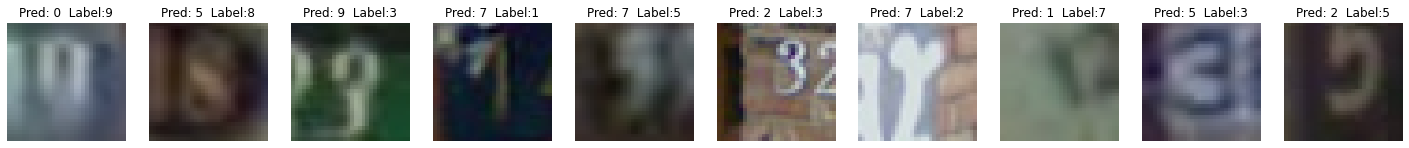

In [68]:
choices = np.random.choice(wrong_idices, 10)
fig, ax = plt.subplots(1, 10, figsize=(25, 25))
for fig_idx, img_idx in enumerate(choices):
    ax[fig_idx].imshow(x_test[img_idx])
    ax[fig_idx].set_title('Pred: ' + str(prediction[img_idx].squeeze()) + '  Label:' + str(y_test[img_idx].squeeze()))
    ax[fig_idx].set_axis_off()

In [69]:
# seems like my model is doing quite ok :)